In [2]:
import matplotlib.pyplot as plt

import Chemobias

from Chemobias import data, visualization, metrics


## Load and visualize data

In [3]:
# Calibration data can be loaded from excel files in the following way.
# calds = io.read_excel("animal_feed.xlsx")

# For convenience, there are example datasets.

calds = data.animal_feed()
calds = data.cgl()
calds = data.wheat()
calds = data.cocoa_beans()
calds = data.gasoline()

print(calds)

# Samples: 60
# Wavelengths: 401
# References: 1
Reference names: ('octane_number',)


In [3]:
# By the way, you can write the calibration file back to an excel file.
# io.write_excel("ejemplo.xlsx")

## Find the optimal number of components

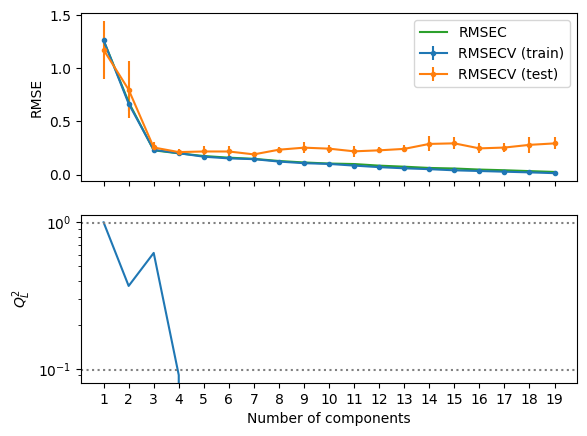

In [4]:
reference_name = calds.reference_names[0]
caldata = calds.select(reference_name)
cross_val = metrics.components_cross_validation(Chemobias.PLSCalibration(), caldata.X, caldata.y, 20)
visualization.plot_components_cross_validation(*cross_val);

## Build and evaluate a regression

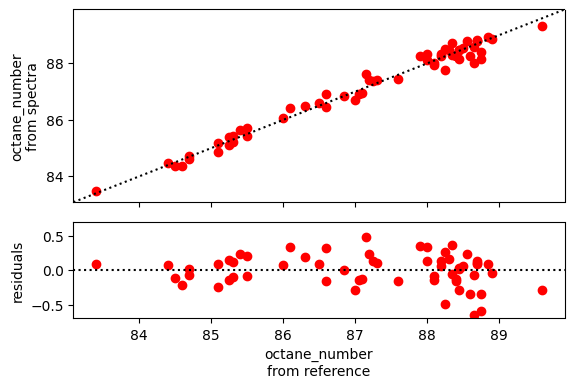

In [5]:
components = 3
model = Chemobias.PLSCalibration(n_components=components)
model.fit_calibration_data(caldata)
visualization.plot_model(model);

### Sample statistics

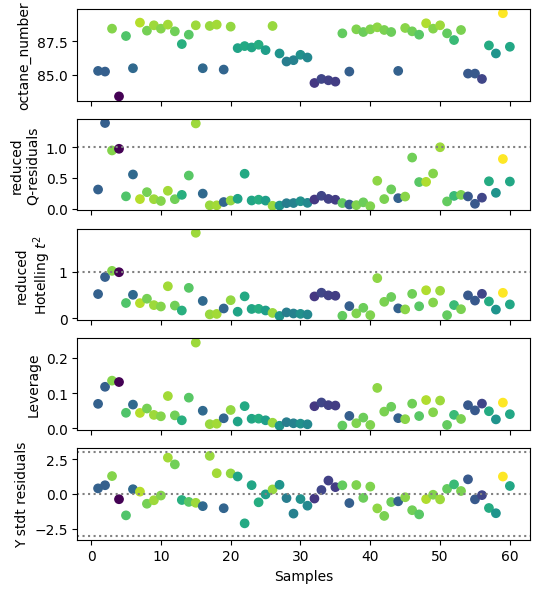

In [6]:
visualization.plot_outlier_detection(model);

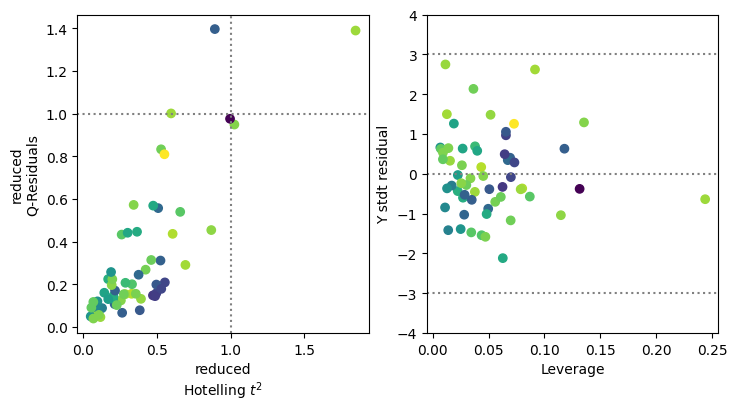

In [7]:
visualization.plot_outlier_detection(model, vs_samples=False);

### Calculate Variable Importance in the Projection

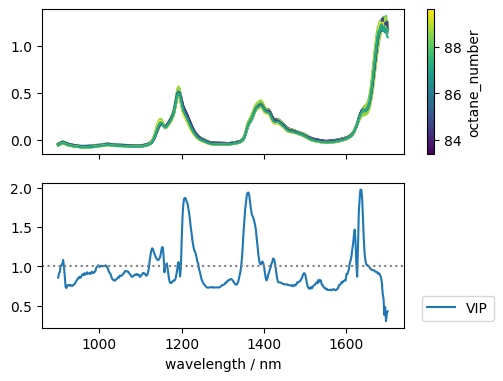

In [8]:
visualization.plot_vip(model);

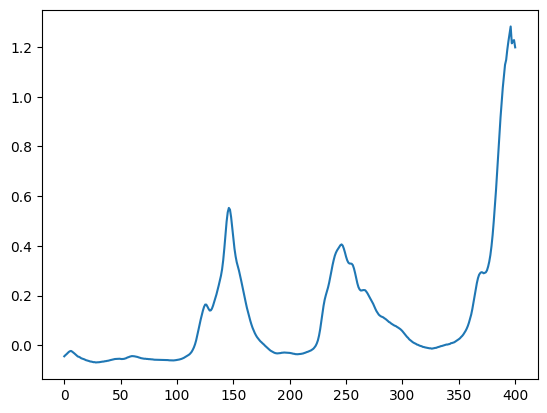

In [9]:
plt.plot(caldata.X[1:2, :].T)

In [10]:
for method in ("Höskuldsson1988", "Faber2002", "BootstrapResiduals", "NoiseAddition"):
    print(method, model.predict_mu_std(caldata.X[1:2, :], method=method))

Höskuldsson1988 (array([85.11115279]), array([0.23465154]))
Faber2002 (array([85.11115279]), array([0.07647643]))
BootstrapResiduals (array([85.11115279]), array([0.22758834]))
NoiseAddition (array([85.11115279]), array([0.0707932]))


In [11]:
for method in ("Höskuldsson1988", "Faber2002", "BootstrapResiduals", "NoiseAddition"):
    print(method, model.predict_mu_std(caldata.X[1:3, :], method=method))

Höskuldsson1988 (array([85.11115279, 88.1684888 ]), array([0.23465154, 0.23977783]))
Faber2002 (array([85.11115279, 88.1684888 ]), array([0.07647643, 0.09194793]))
BootstrapResiduals (array([85.11115279, 88.1684888 ]), array([0.1951226, 0.1951226]))
NoiseAddition (array([85.11115279, 88.1684888 ]), array([0.0857417 , 0.08449647]))


In [12]:
for method in ("Höskuldsson1988", "Faber2002", "BootstrapResiduals", "NoiseAddition"):
    print(method, model.predict_mu_std(caldata.X[1:4, :], method=method))

Höskuldsson1988 (array([85.11115279, 88.1684888 , 83.48273077]), array([0.23465154, 0.23977783, 0.23271517]))
Faber2002 (array([85.11115279, 88.1684888 , 83.48273077]), array([0.07647643, 0.09194793, 0.06984989]))
BootstrapResiduals (array([85.11115279, 88.1684888 , 83.48273077]), array([0.23148729, 0.23148729, 0.23148729]))
NoiseAddition (array([85.11115279, 88.1684888 , 83.48273077]), array([0.08404145, 0.08570582, 0.08537004]))
